<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/TemperaturesByMajorCity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def plot_series(series):
    sns.set_context("talk")
    sns.set_style("ticks")

    fig, ax = plt.subplots(1, 1, figsize=(24, 5))
    ax = series.plot(ax = ax)
    ax.yaxis.grid(True)
    sns.despine(offset=10, trim=True)
    return ax

In [7]:
serie = pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv.zip')

In [8]:
serie.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [9]:
countries = pd.unique(serie['Country']).tolist()

In [10]:
countries

["Côte D'Ivoire",
 'Ethiopia',
 'India',
 'Syria',
 'Egypt',
 'Turkey',
 'Iraq',
 'Thailand',
 'Brazil',
 'Germany',
 'Colombia',
 'South Africa',
 'Morocco',
 'China',
 'United States',
 'Senegal',
 'Tanzania',
 'Bangladesh',
 'Pakistan',
 'Zimbabwe',
 'Vietnam',
 'Nigeria',
 'Indonesia',
 'Saudi Arabia',
 'Afghanistan',
 'Ukraine',
 'Congo (Democratic Republic Of The)',
 'Peru',
 'United Kingdom',
 'Angola',
 'Spain',
 'Philippines',
 'Iran',
 'Australia',
 'Mexico',
 'Somalia',
 'Canada',
 'Russia',
 'Japan',
 'Kenya',
 'France',
 'Burma',
 'Italy',
 'Chile',
 'Dominican Republic',
 'South Korea',
 'Singapore',
 'Taiwan',
 'Sudan']

In [11]:
count_countries = len(countries)
count_countries

49

In [12]:
serie_brazil = serie[serie.Country == 'Brazil']

In [13]:
serie_brazil.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
22319,1832-01-01,22.516,1.556,Belo Horizonte,Brazil,20.09S,44.36W
22320,1832-02-01,23.198,3.471,Belo Horizonte,Brazil,20.09S,44.36W
22321,1832-03-01,22.188,1.667,Belo Horizonte,Brazil,20.09S,44.36W
22322,1832-04-01,20.045,2.743,Belo Horizonte,Brazil,20.09S,44.36W
22323,1832-05-01,18.500,2.253,Belo Horizonte,Brazil,20.09S,44.36W


In [14]:
serie_brazil['dt'] = pd.to_datetime(serie_brazil.dt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
serie_brazil.set_index('dt', inplace=True)

In [16]:
serie_mean_cities = serie_brazil.groupby('City')['AverageTemperature'].mean()
serie_mean_cities

City
Belo Horizonte    21.071396
Brasília          21.727595
Fortaleza         27.008640
Rio De Janeiro    23.788916
Salvador          24.656971
São Paulo         19.699368
Name: AverageTemperature, dtype: float64

In [17]:
serie_fortaleza = serie_brazil[serie_brazil.City == 'Fortaleza']
serie_fortaleza.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1845-01-01,27.354,1.659,Fortaleza,Brazil,4.02S,40.98W
1845-02-01,25.386,2.461,Fortaleza,Brazil,4.02S,40.98W
1845-03-01,25.432,1.412,Fortaleza,Brazil,4.02S,40.98W
1845-04-01,25.182,1.433,Fortaleza,Brazil,4.02S,40.98W
1845-05-01,25.068,1.529,Fortaleza,Brazil,4.02S,40.98W


In [18]:
serie_fortaleza.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,1659.000000,1659.000000
mean,27.008640,0.775052
std,1.182188,0.485451
min,24.274000,0.150000
25%,26.051500,0.422500
50%,27.006000,0.598000
75%,27.936500,1.046500
max,29.986000,3.492000


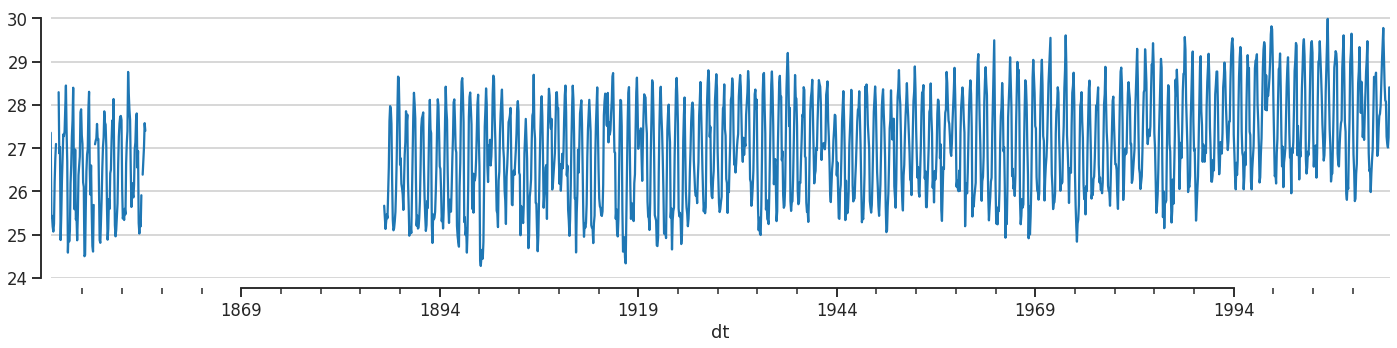

In [19]:
ax = plot_series(serie_fortaleza.AverageTemperature)

In [20]:
states = pd.unique(serie_brazil['City']).tolist()
states

['Belo Horizonte',
 'Brasília',
 'Fortaleza',
 'Rio De Janeiro',
 'São Paulo',
 'Salvador']

In [21]:
count_states = len(states)
print('Total de Estados Brasileiros na base de dados:',count_states)

Total de Estados Brasileiros na base de dados: 6


In [22]:
dados = serie_brazil.groupby('City')['AverageTemperature'].agg(["count"])
dados

,count
City,
Belo Horizonte,2096
Brasília,2096
Fortaleza,1659
Rio De Janeiro,2096
Salvador,2096
São Paulo,2096


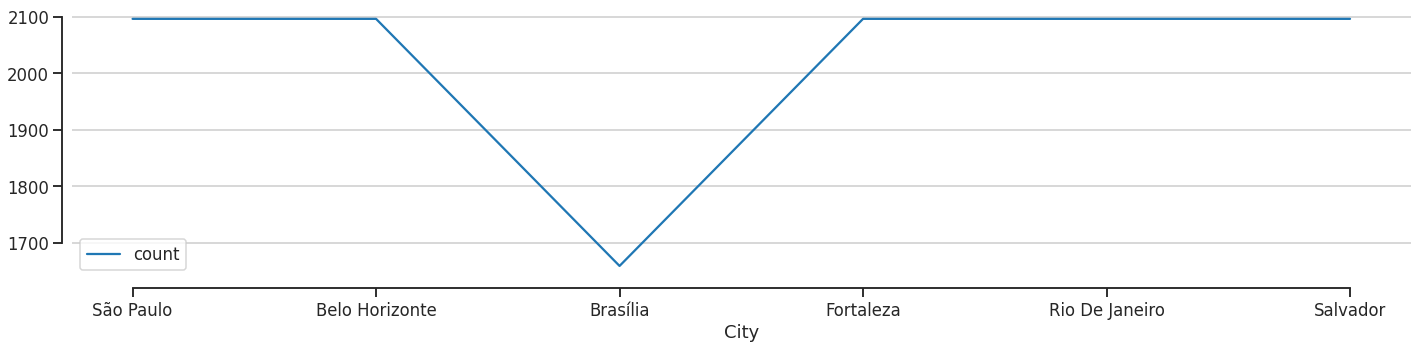

In [23]:
ax = plot_series(dados)

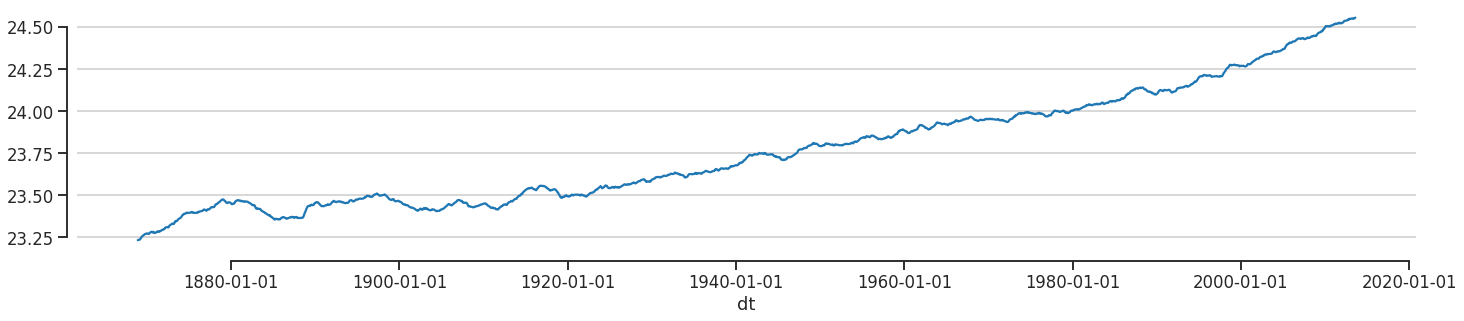

In [24]:
serie_rj = serie_brazil[serie_brazil.City == 'Rio De Janeiro']
serie_rj = serie_rj.dropna()
#serie_rj = serie_rj.iloc[0:149]
ax = plot_series(serie_rj.AverageTemperature.rolling(360).mean())

In [25]:
#dados_agrupados = serie.groupby('City')['AverageTemperature'].agg(["mean"])
dados_agrupados = serie.groupby('City')['AverageTemperature'].mean()
#dados_agrupados.sort_values(by='mean', ascending=False)
dados_agrupados.sort_values(ascending=False)

City
Umm Durman          29.081291
Madras              28.417858
Jiddah              27.692066
Ho Chi Minh City    27.193984
Bangkok             27.164733
                      ...    
Changchun            4.923798
Montreal             4.445014
Moscow               3.999711
Saint Petersburg     3.918045
Harbin               3.625744
Name: AverageTemperature, Length: 100, dtype: float64

In [32]:
data = serie[~serie.AverageTemperature.isna()]
filtered_data = data.loc[:,['dt', 'AverageTemperature']]
filtered_data['dt'] = pd.to_datetime(filtered_data.dt)
filtered_data['month'] = filtered_data.dt.apply(lambda d: d.strftime('%m'))
filtered_data

,dt,AverageTemperature,month
0,1849-01-01,26.704,01
1,1849-02-01,27.434,02
2,1849-03-01,28.101,03
3,1849-04-01,26.140,04
4,1849-05-01,25.427,05
...,...,...,...
239171,2013-04-01,12.563,04
239172,2013-05-01,18.979,05
239173,2013-06-01,23.522,06
239174,2013-07-01,25.251,07


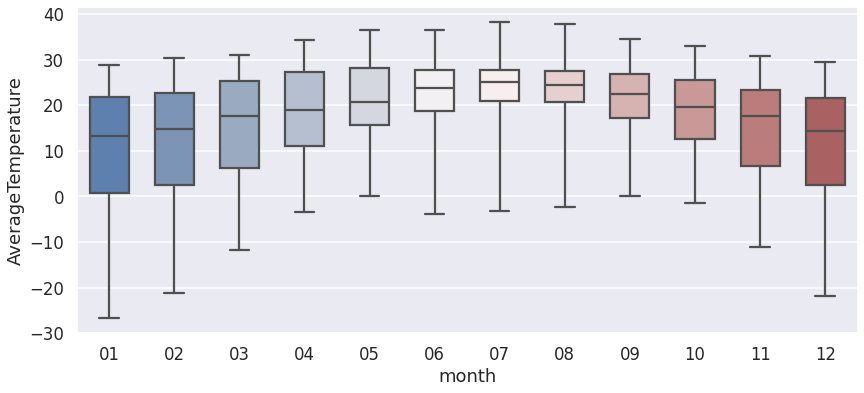

In [31]:
#sns.boxplot(serie['AverageTemperature']);
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
sns.boxplot(x="month", y="AverageTemperature", data=filtered_data,
            whis=[0, 100], width=.6, palette="vlag")

Series([], Name: AverageTemperature, dtype: float64)

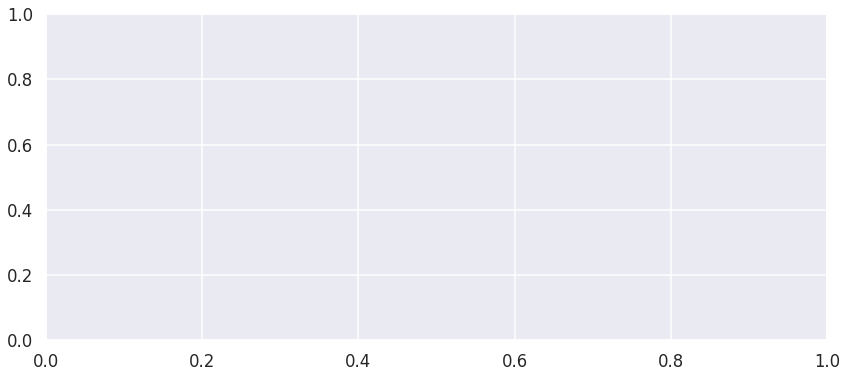

In [37]:
sns.set_style('darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
january = filtered_data[filtered_data.month == 1].AverageTemperature
january
#january.plot(kind='kde', ax=ax, color='pink', lw=5)
#ax.axvline(x=january.min(), color='k')
#ax.axvline(x=january.max(), color='k')
#ax.axvline(x=january.median(), color='k')

quantile_1, quantile_3 = filtered_data.quantile([.25 , .75]).values
ax.axvline(x=quantile_1, color='k')
ax.axvline(x=quantile_3, color='k')
#ax.fill_betweenx(np.arange(0 , .10, .01), np.arange(quantile_1, quantile_3, delta))
ax.set_xlim([-30,40])
ax.set_title(f'{1}')